In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re

In [75]:
df = pd.read_csv('mal-anime.csv')
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [76]:
print(df.columns)

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')


In [77]:
# Step 1: Extract the 'genre' column from the dataframe
genres = df['Genres']

# Step 2: Split the genres by comma and strip any leading or trailing spaces
split_genres = genres.str.split(',').apply(lambda x: [i.strip() for i in x])

# Step 3: Flatten the list of genres and find the unique genres
unique_genres = pd.unique([item for sublist in split_genres for item in sublist])

# Step 4: Print the unique genres
print(unique_genres)

# Step 5: For each unique genre, create a new column in the dataframe. 
# If the genre is in the anime's genre list, set the value to 1, otherwise 0.
for genre in unique_genres:
    df[genre] = split_genres.apply(lambda x: 1 if genre in x else 0)
df.rename(columns={'Unknown': 'Unknown_Genre'}, inplace=True)
print(df.columns)

['Action' 'Adventure' 'Comedy' 'Drama' 'Sci-Fi' 'Space' 'Mystery'
 'Shounen' 'Police' 'Supernatural' 'Magic' 'Fantasy' 'Sports' 'Josei'
 'Romance' 'Slice of Life' 'Cars' 'Seinen' 'Horror' 'Psychological'
 'Thriller' 'Super Power' 'Martial Arts' 'School' 'Ecchi' 'Vampire'
 'Military' 'Historical' 'Dementia' 'Mecha' 'Demons' 'Samurai' 'Game'
 'Shoujo' 'Harem' 'Music' 'Shoujo Ai' 'Shounen Ai' 'Kids' 'Hentai'
 'Parody' 'Yuri' 'Yaoi' 'Unknown']


C:\Users\Shreygoel\AppData\Local\Temp\ipykernel_20180\242124345.py:8: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_genres = pd.unique([item for sublist in split_genres for item in sublist])


Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'Action',
       'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen',
       'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei',
       'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological',
       'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire',
       'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai',
       'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids',
       'Hentai', 'Parody', 'Yuri', 'Yaoi', 'Unknown_Genre'],
      dtype='objec

In [78]:
# # Step 1: Extract the 'studios' column from the dataframe
# studios = df['Studios']

# # Step 2: Split the studios by comma and strip any leading or trailing spaces
# split_studios = studios.str.split(',').apply(lambda x: [i.strip() for i in x])

# # Step 3: Flatten the list of studios and find the unique studios
# unique_studios = pd.unique([item for sublist in split_studios for item in sublist])

# # Step 4: Print the unique studios
# print(unique_studios)

# # Step 5: For each unique studio, create a new column in the dataframe. 
# # If the studio is in the anime's studio list, set the value to 1, otherwise 0.
# for studio in unique_studios:
#     df[studio] = split_studios.apply(lambda x: 1 if studio in x else 0)
# df.rename(columns={'Unknown': 'Unknown_Studio'}, inplace=True)

In [79]:
# # Step 1: Extract the 'Type' column from the dataframe
# types = df['Type']

# # Step 2: Find the unique types
# unique_types = pd.unique(types)

# # Step 3: Print the unique types
# print(unique_types)

# # Step 4: For each unique type, create a new column in the dataframe. 
# # If the type matches the anime's type, set the value to 1, otherwise 0.
# for type_ in unique_types:
#     df[type_] = types.apply(lambda x: 1 if type_ == x else 0)
# df.rename(columns={'Unknown': 'Unknown_Type'}, inplace=True)
# print(df.columns)

In [80]:
print(len(df[df["Episodes"] == "Unknown"]["Name"]))
print(df[df["Episodes"] == "Unknown"]["Name"].head(10))
# Drop all rows with 'Unknown' in the 'Episodes' column (All ongoing anime or missing data)
df = df[df['Episodes'] != 'Unknown']
print(len(df[df["Score"] == "Unknown"]["Name"]))
print(df[df["Score"] == "Unknown"]["Name"].head(10))
# Drop all rows with 'Unknown' in the 'Score' column (I'm thinking of using score as Y)
df = df[df['Score'] != 'Unknown']
df = df[df['Ranked'] != 'Unknown']
df = df[df['Aired'] != 'Unknown']

516
11                     One Piece
211              Detective Conan
871             Crayon Shin-chan
1093            Nintama Rantarou
1787          Sore Ike! Anpanman
2203                   Sazae-san
3650                   Ojarumaru
4477    Chibi Maruko-chan (1995)
5040                    Knyacki!
5334                   Hanakappa
Name: Name, dtype: object
4730
1404                                     Obake no Q-tarou
1504                                      PostPet Momobin
1578                           Shibawanko no Wa no Kokoro
1699                              Silk Road Shounen Yuuto
1893    Hengen Taima Yakou Karura Mau! Sendai Kokeshi ...
1990    Kouchuu Ouja Mushiking Super Battle Movie: Yam...
2165                                  Touma Kishinden Oni
2422            Dorami-chan: Wow, The Kid Gang of Bandits
2425                   Dorami-chan: Hello Kyouryuu Kids!!
2428                        Dorami-chan: A Blue Straw Hat
Name: Name, dtype: object


In [81]:
import re

# Initialize an empty list to store the smallest years
smallest_years = []

# Loop through each value in the 'Aired' column
for aired in df['Aired']:
    # Extract all years using regular expressions
    years = re.findall('(\d{4})', aired)
    
    # Convert the years to integers
    years = [int(year) for year in years]
    
    # If the list of years is not empty, find the smallest year and append it to the list
    if years:
        smallest_years.append(min(years))
    # If the list of years is empty, append a NaN value to the list
    else:
        smallest_years.append(np.nan)

# Replace the 'Aired' column with the smallest years
df['Aired'] = smallest_years
print(df['Aired'].head())

0    1998
1    2001
2    1998
3    2002
4    2004
Name: Aired, dtype: int64


In [82]:
# # Step 1: Extract the 'Rating' column from the dataframe
# ratings = df['Rating']

# # Define the unique ratings
# unique_ratings = ["G", "PG", "PG-13", "R", "R+", "Rx"]

# # For each unique rating, create a new column in the dataframe. 
# # If the rating is contained in the anime's rating string, set the value to 1, otherwise 0.
# for rating in unique_ratings:
#     if rating == "R":
#         df[rating] = ratings.apply(lambda x: 1 if re.search(r'\bR\b', x) else 0)
#     else:
#         df[rating] = ratings.apply(lambda x: 1 if rating in x else 0)
# df.rename(columns={'Unknown': 'Unknown_Rating'}, inplace=True)
# print(df.columns)

In [83]:
def convert_to_seconds(duration):
    time_units = duration.split()
    seconds = 0
    for i in range(0, len(time_units), 2):
        if i+1 < len(time_units):
            if 'h' in time_units[i+1]:
                seconds += int(time_units[i]) * 3600
            elif 'm' in time_units[i+1]:
                seconds += int(time_units[i]) * 60
            elif 's' in time_units[i+1]:
                seconds += int(time_units[i])
    return seconds

df['Duration'] = df['Duration'].apply(convert_to_seconds)
print(df['Duration'].head())

0    1440
1    6900
2    1440
3    1500
4    1380
Name: Duration, dtype: int64

In [84]:
# convert score into float
df['Score'] = df['Score'].astype(float)
df['Episodes'] = df['Episodes'].astype(np.int64)
df['Popularity'] = df['Popularity'].astype(np.int64)
df['Members'] = df['Members'].astype(np.int64)
df['Completed'] = df['Completed'].astype(np.int64)
df['Dropped'] = df['Dropped'].astype(np.int64)
df['Ranked'] = df['Ranked'].astype(float)
df['Plan to Watch'] = df['Plan to Watch'].astype(np.int64)
print(df['Ranked'].head())
for each in df.columns:
    print(each, df[each].dtype)


0      28.0
1     159.0
2     266.0
3    2481.0
4    3710.0
Name: Ranked, dtype: float64
MAL_ID int64
Name object
Score float64
Genres object
English name object
Japanese name object
Type object
Episodes int64
Aired int64
Premiered object
Producers object
Licensors object
Studios object
Source object
Duration int64
Rating object
Ranked float64
Popularity int64
Members int64
Favorites int64
Watching int64
Completed int64
On-Hold int64
Dropped int64
Plan to Watch int64
Score-10 object
Score-9 object
Score-8 object
Score-7 object
Score-6 object
Score-5 object
Score-4 object
Score-3 object
Score-2 object
Score-1 object
Action int64
Adventure int64
Comedy int64
Drama int64
Sci-Fi int64
Space int64
Mystery int64
Shounen int64
Police int64
Supernatural int64
Magic int64
Fantasy int64
Sports int64
Josei int64
Romance int64
Slice of Life int64
Cars int64
Seinen int64
Horror int64
Psychological int64
Thriller int64
Super Power int64
Martial Arts int64
School int64
Ecchi int64
Vampire int64
Milit

C:\Users\Shreygoel\AppData\Local\Temp\ipykernel_20180\2144921311.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(duration, hist = True, kde = True)


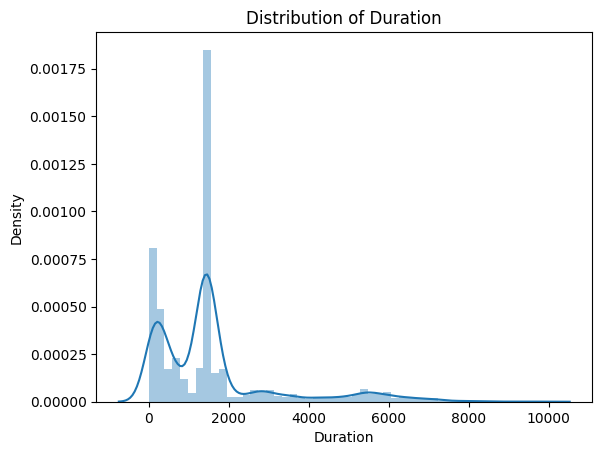

C:\Users\Shreygoel\AppData\Local\Temp\ipykernel_20180\2144921311.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aired, hist = True, kde = True)


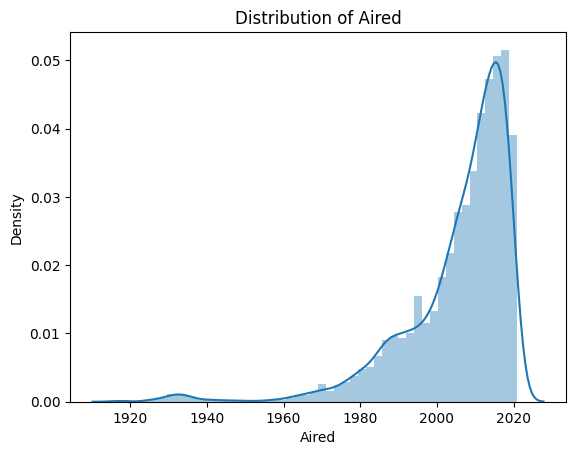

C:\Users\Shreygoel\AppData\Local\Temp\ipykernel_20180\2144921311.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(episodes, hist = True, kde = True)


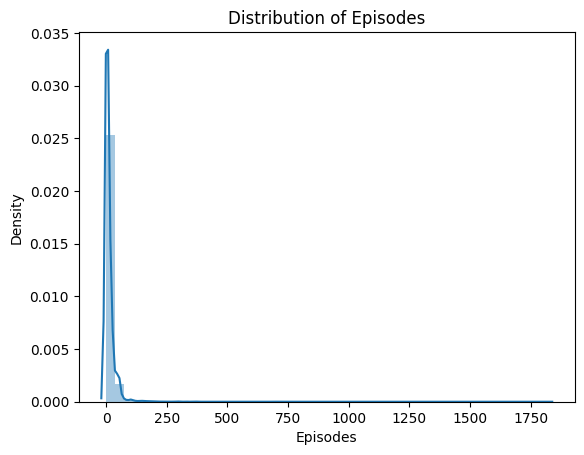

In [85]:
import seaborn as sns

# Drop NaN values from 'Duration' column
duration = df['Duration'].dropna()
aired = df['Aired'].dropna()
episodes = df['Episodes'].dropna()

# Create a histogram with a density curve
sns.distplot(duration, hist = True, kde = True)

plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()
sns.distplot(aired, hist = True, kde = True)
plt.title('Distribution of Aired')
plt.xlabel('Aired')
plt.ylabel('Density')
plt.show()
sns.distplot(episodes, hist = True, kde = True)
plt.title('Distribution of Episodes')
plt.xlabel('Episodes')
plt.ylabel('Density')
plt.show()


In [86]:
df = df.drop(['Type', 'Rating', 'Genres', 'Score-1', 'Score-2', 'Score-3', 'Score-4', 'Score-5', 'Score-6', 'Score-7', 'Score-8', 'Score-9', 'Score-10'], axis=1)
# df = df.drop(['Ranked', 'Popularity', 'Members' , 'Favorites' , 'Watching' , 'Completed' , 'On-Hold', 'Dropped' , 'Plan to Watch'], axis=1)
df = df.drop(['Ranked', 'Favorites', 'Members' , 'Watching' , 'On-Hold' , 'Completed', 'Dropped', 'Plan to Watch'], axis=1)
# df = df.drop(['Ranked'], axis=1)
df = df.drop(['MAL_ID', 'Name', 'English name' , 'Japanese name' , 'Premiered' , 'Producers', 'Licensors'], axis=1)
df = df.drop(['Source', 'Studios'], axis=1)
# df = df.drop(['Unknown_Genre', 'Unknown_Type'], axis=1)
df = df.drop(['Unknown_Genre','Hentai', 'Yuri', 'Yaoi', 'Duration'], axis=1)

In [87]:
for each in df.columns:
    print(each, df[each].dtype)

Score float64
Episodes int64
Aired int64
Popularity int64
Action int64
Adventure int64
Comedy int64
Drama int64
Sci-Fi int64
Space int64
Mystery int64
Shounen int64
Police int64
Supernatural int64
Magic int64
Fantasy int64
Sports int64
Josei int64
Romance int64
Slice of Life int64
Cars int64
Seinen int64
Horror int64
Psychological int64
Thriller int64
Super Power int64
Martial Arts int64
School int64
Ecchi int64
Vampire int64
Military int64
Historical int64
Dementia int64
Mecha int64
Demons int64
Samurai int64
Game int64
Shoujo int64
Harem int64
Music int64
Shoujo Ai int64
Shounen Ai int64
Kids int64
Parody int64


In [88]:
print(df.describe())
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the 'Aired', 'Completed', 'Dropped', and 'Favorites' columns and transform them
df[['Episodes', 'Aired', 'Popularity']] = scaler.fit_transform(df[['Episodes', 'Aired', 'Popularity']])
print(df.describe())

              Score      Episodes         Aired    Popularity        Action  \
count  10988.000000  10988.000000  10988.000000  10988.000000  10988.000000   
mean       6.556049     12.436749   2005.484984   6328.687750      0.296232   
std        0.900702     45.180498     14.610842   3994.475643      0.456615   
min        1.850000      1.000000   1917.000000      1.000000      0.000000   
25%        5.980000      1.000000   2001.000000   2808.000000      0.000000   
50%        6.570000      2.000000   2010.000000   6021.000000      0.000000   
75%        7.200000     12.000000   2015.000000   9721.250000      1.000000   
max        9.190000   1818.000000   2021.000000  15374.000000      1.000000   

          Adventure        Comedy         Drama        Sci-Fi         Space  \
count  10988.000000  10988.000000  10988.000000  10988.000000  10988.000000   
mean       0.205406      0.406261      0.181835      0.195577      0.037131   
std        0.404016      0.491157      0.385726    

In [89]:
import seaborn as sns
from sklearn.model_selection import train_test_split

# 'df' is your DataFrame and 'Score' is the target column
X = df.drop('Score', axis=1)
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

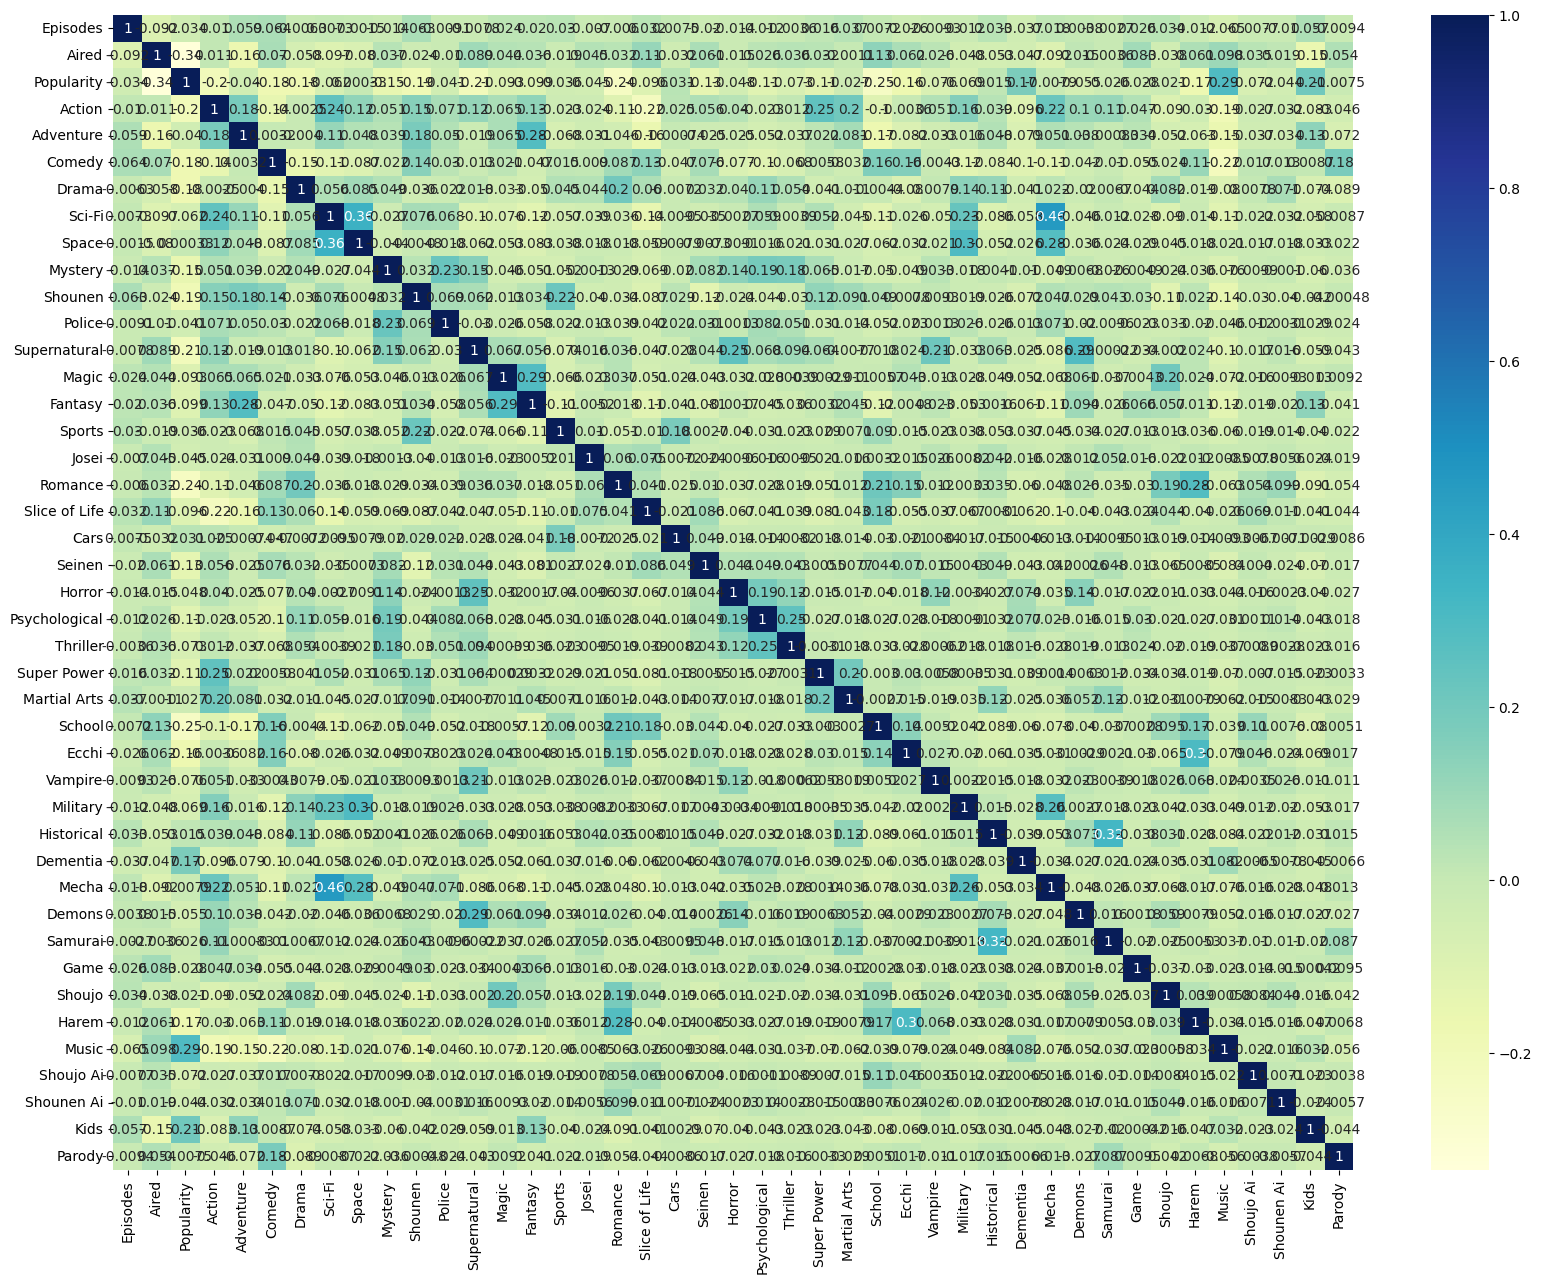

In [90]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [91]:
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_vif(X, index):
    # Create a mask to exclude the feature for which the VIF is being calculated
    mask = np.arange(X.shape[1]) != index

    # Fit a linear regression model for the feature against all other features
    model = LinearRegression()
    model.fit(X.iloc[:, mask], X.iloc[:, index])

    # Calculate the R-squared score
    r_squared = model.score(X.iloc[:, mask], X.iloc[:, index])

    # Calculate and return the VIF
    return 1 / (1 - r_squared)
# Initialize the dataframe that will hold the VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [calculate_vif(X_train, i) for i in range(X_train.shape[1])]

print(vif_data)

          feature       VIF
0        Episodes  1.034062
1           Aired  1.305683
2      Popularity  1.831040
3          Action  1.472313
4       Adventure  1.289079
5          Comedy  1.349232
6           Drama  1.211010
7          Sci-Fi  1.532202
8           Space  1.247624
9         Mystery  1.199588
10        Shounen  1.256743
11         Police  1.096927
12   Supernatural  1.311787
13          Magic  1.175695
14        Fantasy  1.347402
15         Sports  1.181963
16          Josei  1.026585
17        Romance  1.302181
18  Slice of Life  1.226454
19           Cars  1.047722
20         Seinen  1.102022
21         Horror  1.153259
22  Psychological  1.178996
23       Thriller  1.105145
24    Super Power  1.145843
25   Martial Arts  1.128068
26         School  1.249746
27          Ecchi  1.197680
28        Vampire  1.073932
29       Military  1.198792
30     Historical  1.225968
31       Dementia  1.086922
32          Mecha  1.393479
33         Demons  1.133702
34        Samurai  1

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Create a LinearRegression instance
model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")

# Print the mean of the cross-validation scores
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.58684499 0.55438671 0.61934207 0.55185646 0.54361245]
Mean cross-validation score: 0.57120853658007


In [93]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Print the intercept of the model
print(f"Intercept: {model.intercept_}")

# Print the coefficients of each feature
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print the R-squared score and mean squared error
print(f"R-squared Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Intercept: 6.276225794276145
Episodes: 0.031534389721405785
Aired: 0.04005054398966962
Popularity: -0.5624449619447758
Action: -0.0005103423570098508
Adventure: 0.15058474314276346
Comedy: 0.10631835360808203
Drama: 0.23452416139293894
Sci-Fi: 0.029992538079043517
Space: 0.1365089601784434
Mystery: 0.2338416390981998
Shounen: 0.24743903053206495
Police: 0.17841001709483564
Supernatural: 0.0992374420427281
Magic: 0.04529881542672892
Fantasy: 0.02767879675814598
Sports: 0.21347722971613184
Josei: -0.011873926990280958
Romance: 0.027622193803547336
Slice of Life: 0.16490129316342025
Cars: 0.048985299899756286
Seinen: 0.1549659073421681
Horror: -0.3812224682381365
Psychological: 0.06321434437062103
Thriller: 0.20197877324841776
Super Power: 0.030613312616348656
Martial Arts: 0.07390172239016467
School: 0.04179892155292179
Ecchi: -0.36057490534121484
Vampire: -0.016611340557003945
Military: 0.13286203081610926
Historical: 0.284552375953728
Dementia: -0.47055980437253053
Mecha: 0.08020777363

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a LinearRegression instance
model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Fit the model to the training data
model.fit(X_train_rfe, y_train)

# Print the features selected by RFE
selected_features = pd.Series(rfe.support_, index = X_train.columns)
print(selected_features[selected_features==True].index)

# Make predictions on the testing data
X_test_rfe = rfe.transform(X_test)
y_pred = model.predict(X_test_rfe)

# Calculate and print the R-squared score and mean squared error
print(f"R-squared Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Index(['Popularity', 'Drama', 'Mystery', 'Shounen', 'Horror', 'Ecchi',
       'Historical', 'Dementia', 'Shoujo', 'Harem'],
      dtype='object')
R-squared Score: 0.5244493500388083
Mean Squared Error: 0.39617481324604714
Mean Absolute Error: 0.4633416326225825


In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

def custom_leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.02)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Add an input layer and two hidden layers with 10 neurons each
model.add(Dense(7, input_dim=X_train_scaled.shape[1], activation=custom_leaky_relu))
model.add(Dense(7, activation=custom_leaky_relu))
model.add(Dense(7, activation=custom_leaky_relu))
model.add(Dense(7, activation=custom_leaky_relu))



# Add an output layer with 1 neuron (since this is a regression problem)
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='rmsprop')

# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=1)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate and print the R-squared score and mean squared error
print(f"R-squared Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Epoch 1/50
550/550 [==============================] - 1s 795us/step - loss: 6.9191
Epoch 2/50
550/550 [==============================] - 0s 779us/step - loss: 0.6147
Epoch 3/50
550/550 [==============================] - 0s 818us/step - loss: 0.4500
Epoch 4/50
550/550 [==============================] - 0s 842us/step - loss: 0.3991
Epoch 5/50
550/550 [==============================] - 0s 855us/step - loss: 0.3756
Epoch 6/50
550/550 [==============================] - 0s 744us/step - loss: 0.3658
Epoch 7/50
550/550 [==============================] - 0s 792us/step - loss: 0.3595
Epoch 8/50
550/550 [==============================] - 0s 853us/step - loss: 0.3576
Epoch 9/50
550/550 [==============================] - 0s 853us/step - loss: 0.3493
Epoch 10/50
550/550 [==============================] - 0s 767us/step - loss: 0.3454
Epoch 11/50
550/550 [==============================] - 0s 730us/step - loss: 0.3457
Epoch 12/50
550/550 [==============================] - 0s 738us/step - loss: 0.3434
E

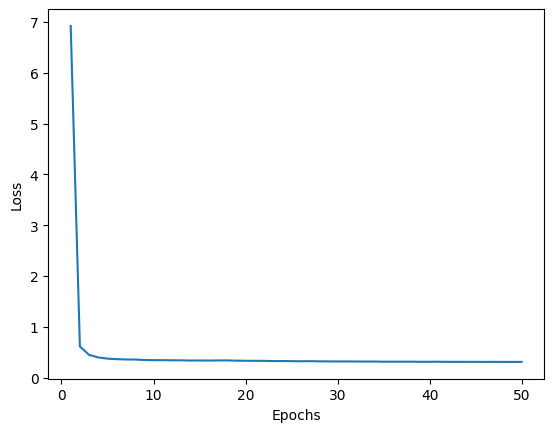

In [96]:
epochs = range(1, 51)
loss_train = history.history['loss']
plt.plot(epochs, loss_train)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# NLP and Scoring

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re

In [98]:
df = pd.read_csv("anime_with_synopsis.csv")
print(len(df))
df.head(10)

16214


,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Sena is like any other shy kid starting high s...
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life","Yuuta Takemoto, a sophomore at an arts college..."
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",Kyosuke Kano has lived under the shadow of his...
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",Takumi Fujiwara finally joins Ryousuke and Kei...
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...","Dr. Kenzou Tenma, an elite neurosurgeon recent..."


In [99]:
print(df.columns)

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'sypnopsis'], dtype='object')


In [100]:
#Data Cleaning
# Drop all the rows with Unknown in the 'Score' column
print(df[df['Score'] == 'Unknown'].head(5))
df = df[df['Score'] != 'Unknown']
# Drop all the rows with no synopsis information
print(df[df['sypnopsis'] == 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here .'].head(5))
df = df[df['sypnopsis'] != 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here .']
print(f"Length after Removing Unknow entries: {len(df)}" )

      MAL_ID                                               Name    Score  \
1347    1547                                   Obake no Q-tarou  Unknown   
1439    1656                                    PostPet Momobin  Unknown   
1512    1739                         Shibawanko no Wa no Kokoro  Unknown   
1619    1863                            Silk Road Shounen Yuuto  Unknown   
1808    2073  Hengen Taima Yakou Karura Mau! Sendai Kokeshi ...  Unknown   

                                           Genres  \
1347  Comedy, School, Slice of Life, Supernatural   
1439                                 Comedy, Kids   
1512                                         Kids   
1619               Adventure, Fantasy, Historical   
1808                               Horror, Shoujo   

                                              sypnopsis  
1347  Q-taro, a monster, is living with the Ohara fa...  
1439  omo and Komomo can deliver mail from anyone, t...  
1512  Based on a japanese children`s book by Yoshi

In [101]:
#Turing Score into float
df['Score'] = df['Score'].astype(float)
df.head(10)

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Sena is like any other shy kid starting high s...
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life","Yuuta Takemoto, a sophomore at an arts college..."
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",Kyosuke Kano has lived under the shadow of his...
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",Takumi Fujiwara finally joins Ryousuke and Kei...
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...","Dr. Kenzou Tenma, an elite neurosurgeon recent..."


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Preprocess the synopsis text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['sypnopsis'].values.astype('U'))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Score'], test_size=0.2, random_state=42)



# Define the MLP model
# Random siliness cause parameter tuning sucks
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
# model.add(Dense(10, activation='relu'))

# Add an output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer="rmsprop")

# Train the model
total_epochs = 50

history = model.fit(X_train.toarray(), y_train, epochs=total_epochs, batch_size=32, verbose=1)

# Predict on the test set
predictions = model.predict(X_test.toarray())

# Calculate the R^2 score
r2 = r2_score(y_test, predictions)
print('R^2 Score:', r2)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)\

# Evaluate the mean absolute error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

Epoch 1/50
273/273 [==============================] - 1s 916us/step - loss: 32.2220
Epoch 2/50
273/273 [==============================] - 0s 819us/step - loss: 3.6399
Epoch 3/50
273/273 [==============================] - 0s 823us/step - loss: 0.7698
Epoch 4/50
273/273 [==============================] - 0s 949us/step - loss: 0.6482
Epoch 5/50
273/273 [==============================] - 0s 813us/step - loss: 0.5953
Epoch 6/50
273/273 [==============================] - 0s 818us/step - loss: 0.5660
Epoch 7/50
273/273 [==============================] - 0s 821us/step - loss: 0.5471
Epoch 8/50
273/273 [==============================] - 0s 928us/step - loss: 0.5351
Epoch 9/50
273/273 [==============================] - 0s 808us/step - loss: 0.5244
Epoch 10/50
273/273 [==============================] - 0s 860us/step - loss: 0.5167
Epoch 11/50
273/273 [==============================] - 0s 935us/step - loss: 0.5117
Epoch 12/50
273/273 [==============================] - 0s 990us/step - loss: 0.5073


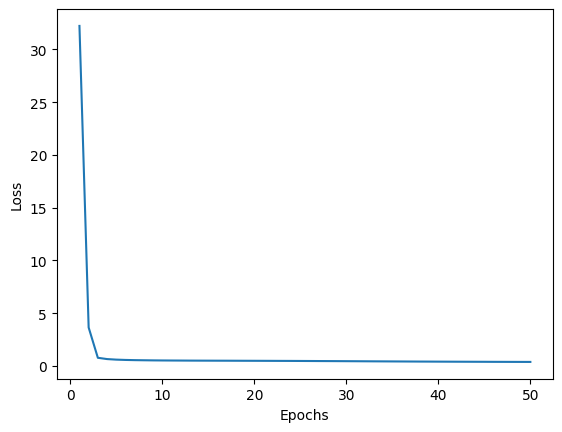

In [103]:
epochs = range(1, total_epochs+1)
loss_train = history.history['loss']
plt.plot(epochs, loss_train)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


# Preprocess the synopsis text data
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(df['sypnopsis'].values.astype('U'))
sequences = tokenizer.texts_to_sequences(df['sypnopsis'].values.astype('U'))

# Pad the sequences
X = pad_sequences(sequences)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Score'], test_size=0.2, random_state=42)

# Define the LSTM model with dropout and regularization
model = Sequential()
model.add(Embedding(1000, 32))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(LSTM(64, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer="adam")

# Train the model
total_epochs = 20
history = model.fit(X_train, y_train, epochs=total_epochs, batch_size=64, verbose=1)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, predictions)
print('R^2 Score:', r2)

Epoch 1/20
137/137 [==============================] - 42s 285ms/step - loss: 6.1777
Epoch 2/20
137/137 [==============================] - 40s 290ms/step - loss: 2.0423
Epoch 3/20
137/137 [==============================] - 40s 292ms/step - loss: 1.8100
Epoch 4/20
137/137 [==============================] - 40s 291ms/step - loss: 1.7024
Epoch 5/20
137/137 [==============================] - 40s 294ms/step - loss: 1.5936
Epoch 6/20
137/137 [==============================] - 40s 294ms/step - loss: 1.5733
Epoch 7/20
137/137 [==============================] - 40s 291ms/step - loss: 1.5501
Epoch 8/20
137/137 [==============================] - 41s 301ms/step - loss: 1.5524
Epoch 9/20
137/137 [==============================] - 40s 295ms/step - loss: 1.4896
Epoch 10/20
137/137 [==============================] - 42s 307ms/step - loss: 1.4844
Epoch 11/20
137/137 [==============================] - 41s 298ms/step - loss: 1.4471
Epoch 12/20
137/137 [==============================] - 40s 292ms/step - lo